# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Updated the Weather Map API keys to unique keys and also ensure to store images with relevant names based on plot
# By: Aruna Amaresan
# Last Updated: Feb 13th 2018 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
#api_key_orig = "924783bda048569443e49dd6a03e5591"

api_key = "35f9addc033a3eddcd538e1df0680fd0"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=chifeng
Processing Record 2 of Set 1 | panjakent
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=panjakent
Processing Record 3 of Set 1 | paredon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=paredon
Processing Record 4 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=yellowknife
Processing Record 5 of Set 1 | vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=vallenar
Processing Record 6 of Set 1 | san jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=san%20jeronimo
Processing Rec

Processing Record 3 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=bredasdorp
Processing Record 4 of Set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=taolanaro
City not found. Skipping...
Processing Record 5 of Set 2 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=soyo
Processing Record 6 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=tuktoyaktuk
Processing Record 7 of Set 2 | sawakin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=sawakin
Processing Record 8 of Set 2 | riaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=riaba
City not found. Skipping...
Processing Record 9 of Set 2 | thomp

Processing Record 6 of Set 3 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=ahipara
Processing Record 7 of Set 3 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=barentsburg
City not found. Skipping...
Processing Record 8 of Set 3 | albina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=albina
Processing Record 9 of Set 3 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=airai
Processing Record 10 of Set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=mahebourg
Processing Record 11 of Set 3 | hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=hokitika
Processing Record 12 of Set 3 | alta gracia
http://api.openwea

Processing Record 9 of Set 4 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=comodoro%20rivadavia
Processing Record 10 of Set 4 | meinung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=meinung
City not found. Skipping...
Processing Record 11 of Set 4 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=taburi
City not found. Skipping...
Processing Record 12 of Set 4 | mashhad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=mashhad
Processing Record 13 of Set 4 | keelung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=keelung
Processing Record 14 of Set 4 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=longyearbyen
Process

Processing Record 12 of Set 5 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=chapais
Processing Record 13 of Set 5 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=havoysund
Processing Record 14 of Set 5 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=laguna
Processing Record 15 of Set 5 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=saint-francois
Processing Record 16 of Set 5 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 5 | acheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=acheng
Processing Record 18 of Set 5 | sa

Processing Record 15 of Set 6 | trenggalek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=trenggalek
Processing Record 16 of Set 6 | abancay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=abancay
Processing Record 17 of Set 6 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=bethel
Processing Record 18 of Set 6 | garden city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=garden%20city
Processing Record 19 of Set 6 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=samarai
Processing Record 20 of Set 6 | calvinia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=calvinia
Processing Record 21 of Set 6 | crestview
http://api.openweathermap.org/data/2

Processing Record 19 of Set 7 | skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=skjervoy
Processing Record 20 of Set 7 | suez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=suez
Processing Record 21 of Set 7 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=prince%20rupert
Processing Record 22 of Set 7 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=adrar
Processing Record 23 of Set 7 | sadovoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=sadovoye
Processing Record 24 of Set 7 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=kenai
Processing Record 25 of Set 7 | cassilandia
http://api.openweathermap.org/data/2.5/weather

Processing Record 24 of Set 8 | teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=teguldet
Processing Record 25 of Set 8 | ust-bolsheretsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=ust-bolsheretsk
City not found. Skipping...
Processing Record 26 of Set 8 | tougan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=tougan
Processing Record 27 of Set 8 | hun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=hun
Processing Record 28 of Set 8 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=esperance
Processing Record 29 of Set 8 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=preobrazheniye
Processing Record 30 of Set 8 | lebanon


Processing Record 26 of Set 9 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=hervey%20bay
Processing Record 27 of Set 9 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=sergeyevka
Processing Record 28 of Set 9 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=moose%20factory
Processing Record 29 of Set 9 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=leshukonskoye
Processing Record 30 of Set 9 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=bonthe
Processing Record 31 of Set 9 | chongwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=chongwe
Processing Record 32 of Set 9 | plettenberg bay
http://a

Processing Record 28 of Set 10 | mutsamudu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=mutsamudu
City not found. Skipping...
Processing Record 29 of Set 10 | midyat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=midyat
Processing Record 30 of Set 10 | wad madani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=wad%20madani
City not found. Skipping...
Processing Record 31 of Set 10 | bure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=bure
Processing Record 32 of Set 10 | nassau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=nassau
Processing Record 33 of Set 10 | bokspits
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=bokspits
City not found. Skipping...


Processing Record 30 of Set 11 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=srednekolymsk
Processing Record 31 of Set 11 | berdychiv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=berdychiv
Processing Record 32 of Set 11 | elizabeth city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=elizabeth%20city
Processing Record 33 of Set 11 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=guerrero%20negro
Processing Record 34 of Set 11 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=sobolevo
Processing Record 35 of Set 11 | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=general%20roca
Processing Record 36 of Se

Processing Record 33 of Set 12 | erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=erenhot
Processing Record 34 of Set 12 | la romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=la%20romana
Processing Record 35 of Set 12 | loiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=loiza
Processing Record 36 of Set 12 | dongkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=dongkan
Processing Record 37 of Set 12 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=karaul
City not found. Skipping...
Processing Record 38 of Set 12 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35f9addc033a3eddcd538e1df0680fd0&q=vestmannaeyjar
Processing Record 39 of Set 12 | qurayyat
http

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chifeng,0,CN,1518557252,70,42.27,118.96,9.26,7.96
1,panjakent,75,UZ,1518553800,66,39.50,67.61,48.20,2.24
2,paredon,64,BO,1518557254,74,-18.93,-65.16,57.73,2.93
3,yellowknife,75,CA,1518555600,63,62.45,-114.38,-7.61,11.41
4,vallenar,20,CL,1518557254,75,-28.58,-70.76,72.71,2.93


## Latitude vs Temperature Plot

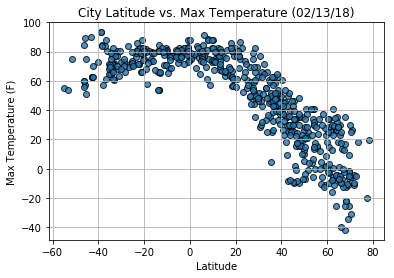

In [11]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/1_Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

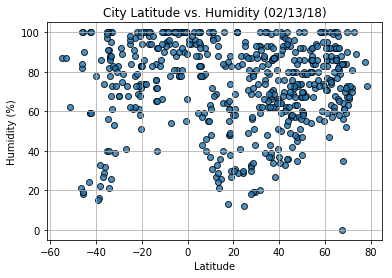

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/2_Lat_vs_Humid.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

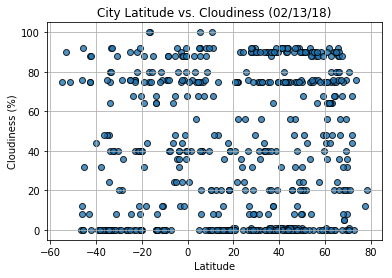

In [13]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/3_Lat_vs_Cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

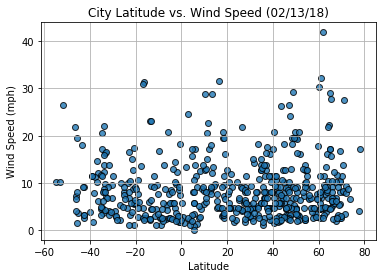

In [14]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/4_Lat_vs_WindSp.png")

# Show plot
plt.show()